# Rede Neural Convolucional Simples para identificar se  uma foto é do Carlos Bolsonaro ou da Thammy Gretchen

In [89]:
import numpy as np
import tensorflow as tf
import cv2
import pandas as pd
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,  Conv2D, MaxPool2D, Dropout, Flatten

# Loading Data

In [90]:
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=90,
    featurewise_std_normalization=True,
    zoom_range=0.2    
)

train_image_generator = train_datagen.flow_from_directory(
    'train',
    target_size=(128,128),
    classes=['carlos','thammy'],
    class_mode='categorical',
    save_to_dir='augmented/train'
)

Found 37 images belonging to 2 classes.


/home/sabinogs/.virtualenvs/ml/local/lib/python3.5/site-packages/keras_preprocessing/image/image_data_generator.py:346: UserWarning: This ImageDataGenerator specifies `featurewise_std_normalization`, which overrides setting of `featurewise_center`.
  warnings.warn('This ImageDataGenerator specifies '


In [91]:
test_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=90,
    featurewise_std_normalization=True,
    zoom_range=0.2    
)

test_image_generator = test_datagen.flow_from_directory(
    'test',
    target_size=(128,128),
    classes=['carlos','thammy'],
    class_mode='categorical',
    save_to_dir='augmented/test'
)

Found 20 images belonging to 2 classes.


/home/sabinogs/.virtualenvs/ml/local/lib/python3.5/site-packages/keras_preprocessing/image/image_data_generator.py:346: UserWarning: This ImageDataGenerator specifies `featurewise_std_normalization`, which overrides setting of `featurewise_center`.
  warnings.warn('This ImageDataGenerator specifies '


# Definições

In [92]:
NUM_CLASSES = 2
CLASSES = {
    0: 'CARLOS',
    1: 'THAMMY'
}

In [93]:
model = Sequential()

model.add(
    Conv2D(
        32, 
        (3,3),
        padding='same',
        input_shape=(128,128,3),
        activation='relu'
    )
)
model.add(Conv2D(32, (3,3), activation='relu'))
model.add(Conv2D(32, (3,3), activation='relu'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(0.5))
model.add(Flatten())
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(NUM_CLASSES, activation='softmax'))


In [94]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['acc'])

In [95]:
model.fit_generator(
    train_image_generator,
    steps_per_epoch=2000,
    epochs=100,
    validation_data=test_image_generator,
    validation_steps=800
)

/home/sabinogs/.virtualenvs/ml/local/lib/python3.5/site-packages/keras_preprocessing/image/image_data_generator.py:699: UserWarning: This ImageDataGenerator specifies `featurewise_center`, but it hasn't been fit on any training data. Fit it first by calling `.fit(numpy_data)`.
  warnings.warn('This ImageDataGenerator specifies '
/home/sabinogs/.virtualenvs/ml/local/lib/python3.5/site-packages/keras_preprocessing/image/image_data_generator.py:707: UserWarning: This ImageDataGenerator specifies `featurewise_std_normalization`, but it hasn't been fit on any training data. Fit it first by calling `.fit(numpy_data)`.
  warnings.warn('This ImageDataGenerator specifies '


Epoch 1/100
2/2 [==============================] - 58s 29s/step - loss: 4.0164 - acc: 0.5135 - val_loss: 8.0590 - val_acc: 0.5000
Epoch 2/100
2/2 [==============================] - 9s 4s/step - loss: 7.6206 - acc: 0.4865 - val_loss: 8.0590 - val_acc: 0.5000
Epoch 3/100
2/2 [==============================] - 4s 2s/step - loss: 8.4750 - acc: 0.4865 - val_loss: 6.6125 - val_acc: 0.5000
Epoch 4/100
2/2 [==============================] - 4s 2s/step - loss: 5.0521 - acc: 0.4865 - val_loss: 1.4881 - val_acc: 0.5000
Epoch 5/100
2/2 [==============================] - 4s 2s/step - loss: 1.3329 - acc: 0.5135 - val_loss: 1.0083 - val_acc: 0.5000
Epoch 6/100
2/2 [==============================] - 4s 2s/step - loss: 0.7426 - acc: 0.5405 - val_loss: 0.6821 - val_acc: 0.5000
Epoch 7/100
2/2 [==============================] - 4s 2s/step - loss: 0.6777 - acc: 0.5135 - val_loss: 0.6909 - val_acc: 0.5000
Epoch 8/100
2/2 [==============================] - 4s 2s/step - loss: 0.7083 - acc: 0.4865 - val_loss:

Epoch 40/100
2/2 [==============================] - 4s 2s/step - loss: 0.5730 - acc: 0.6757 - val_loss: 0.9876 - val_acc: 0.4500
Epoch 41/100
2/2 [==============================] - 4s 2s/step - loss: 0.6489 - acc: 0.6757 - val_loss: 0.9384 - val_acc: 0.7000
Epoch 42/100
2/2 [==============================] - 4s 2s/step - loss: 0.6320 - acc: 0.6486 - val_loss: 0.9412 - val_acc: 0.6500
Epoch 43/100
2/2 [==============================] - 4s 2s/step - loss: 0.6460 - acc: 0.6757 - val_loss: 0.8714 - val_acc: 0.6500
Epoch 44/100
2/2 [==============================] - 4s 2s/step - loss: 0.5801 - acc: 0.7297 - val_loss: 0.9256 - val_acc: 0.6000
Epoch 45/100
2/2 [==============================] - 4s 2s/step - loss: 0.6068 - acc: 0.6757 - val_loss: 0.9529 - val_acc: 0.6500
Epoch 46/100
2/2 [==============================] - 4s 2s/step - loss: 0.5952 - acc: 0.6486 - val_loss: 0.9821 - val_acc: 0.6000
Epoch 47/100
2/2 [==============================] - 4s 2s/step - loss: 0.6128 - acc: 0.7027 - val

Epoch 79/100
2/2 [==============================] - 4s 2s/step - loss: 0.4915 - acc: 0.6757 - val_loss: 1.3014 - val_acc: 0.5500
Epoch 80/100
2/2 [==============================] - 4s 2s/step - loss: 0.4579 - acc: 0.7568 - val_loss: 1.0483 - val_acc: 0.7000
Epoch 81/100
2/2 [==============================] - 4s 2s/step - loss: 0.3742 - acc: 0.8108 - val_loss: 1.3428 - val_acc: 0.5000
Epoch 82/100
2/2 [==============================] - 4s 2s/step - loss: 0.5049 - acc: 0.7027 - val_loss: 1.5487 - val_acc: 0.5000
Epoch 83/100
2/2 [==============================] - 4s 2s/step - loss: 0.3361 - acc: 0.8378 - val_loss: 1.4269 - val_acc: 0.6000
Epoch 84/100
2/2 [==============================] - 4s 2s/step - loss: 0.3733 - acc: 0.8378 - val_loss: 1.4254 - val_acc: 0.6500
Epoch 85/100
2/2 [==============================] - 4s 2s/step - loss: 0.4931 - acc: 0.6757 - val_loss: 0.9834 - val_acc: 0.4500
Epoch 86/100
2/2 [==============================] - 4s 2s/step - loss: 0.3773 - acc: 0.8108 - val

In [138]:
predictions = model.predict_generator(
    test_image_generator, 
    2000, 
    verbose=1
)
predictions_df = pd.DataFrame(predictions, columns = ['Carlos', 'Thammy'])

/home/sabinogs/.virtualenvs/ml/local/lib/python3.5/site-packages/keras_preprocessing/image/image_data_generator.py:699: UserWarning: This ImageDataGenerator specifies `featurewise_center`, but it hasn't been fit on any training data. Fit it first by calling `.fit(numpy_data)`.
  warnings.warn('This ImageDataGenerator specifies '
/home/sabinogs/.virtualenvs/ml/local/lib/python3.5/site-packages/keras_preprocessing/image/image_data_generator.py:707: UserWarning: This ImageDataGenerator specifies `featurewise_std_normalization`, but it hasn't been fit on any training data. Fit it first by calling `.fit(numpy_data)`.
  warnings.warn('This ImageDataGenerator specifies '


1/1 [==============================] - 1s 564ms/step


In [142]:
predictions_df.head()

,Carlos,Thammy
0,0.072360,0.927640
1,0.424078,0.575922
2,0.219452,0.780548
3,0.971141,0.028859
4,0.063805,0.936195


In [135]:
from imutils import resize
import matplotlib.pyplot as plt

%matplotlib inline

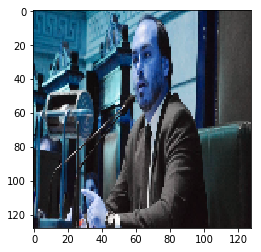

In [137]:
alvo = cv2.imread('test/carlos/27.jpg')
alvo = cv2.resize(alvo, (128,128))
alvo = alvo.reshape((1,128,128,3))
alvo.shape

plt.imshow(alvo.reshape(128,128,3))

In [134]:
pre  = np.argmax(model.predict(alvo))
CLASSES[pre]

'THAMMY'